In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn
import numpy as np
import pandas as pd
# import packages

In [3]:
sim_staticV1 = pd.read_csv("../Data/Static_Data_ICU_var1_peak.csv")
sim_staticV2 = pd.read_csv("../Data/Static_Data_ICU_var2_peak.csv")
sim_staticV3 = pd.read_csv("../Data/Static_Data_ICU_var3.csv")
sim_staticV4 = pd.read_csv("../Data/Static_Data_ICU_var4_peak_v2.csv")

sim_staticV1 = sim_staticV1.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV1 = sim_staticV1.replace(["M", "F"], [0,1])

sim_staticV2 = sim_staticV2.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV2 = sim_staticV2.replace(["M", "F"], [0,1])

sim_staticV3 = sim_staticV3.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV3 = sim_staticV3.replace(["M", "F"], [0,1])


sim_staticV4 = sim_staticV4.drop(columns=["Unnamed: 0", "CHM"])
sim_staticV4 = sim_staticV4.replace(["M", "F"], [0,1])


# var2 dataset has higher variance in simulated values, so we would expect worse model performance
# var3 dataset should have even higher variance

sim_staticV1.columns

# read in data and clean 

Index(['ICU', 'Age', 'Sex', 'Survival Probability', 'Score', 'Kidney', 'Blood',
       'Cholesterol', 'Immune', 'ApacheII', 'Urine Volume', 'Creatinine',
       'Urea', 'O2', 'HR', 'BP', 'RBC', 'LDL', 'HDL', 'Platelet', 'WBC', 'INR',
       'Death'],
      dtype='object')

In [4]:
# Goal: predict death tag based on data
x_train1, x_test1, y_train1, y_test1 = train_test_split(sim_staticV1.drop(["ICU","Death","Survival Probability", "Score", "Kidney", "Blood", "Cholesterol", "Immune"], axis = "columns"), sim_staticV1["Death"], test_size = 0.34)

x_train2, x_test2, y_train2, y_test2 = train_test_split(sim_staticV2.drop(["ICU","Death","Survival Probability"], axis = "columns"), sim_staticV2["Death"], test_size = 0.34)

x_train3, x_test3, y_train3, y_test3 = train_test_split(sim_staticV3.drop(["ICU","Death","Survival_Probability", "Score", "Kidney", "Blood", "Cholesterol", "Immune"], axis = "columns"), sim_staticV3["Death"], test_size = 0.34)

x_trainR1, x_testR1, y_trainR1, y_testR1 = train_test_split(sim_staticV1.drop(["ICU","Death","Survival Probability", "Score", "Kidney", "Blood", "Cholesterol", "Immune"], axis = "columns"), sim_staticV1["Survival Probability"], test_size = 0.34)

x_trainR2, x_testR2, y_trainR2, y_testR2 = train_test_split(sim_staticV2.drop(["ICU","Death","Survival Probability", "Score", "Kidney", "Blood", "Cholesterol", "Immune"], axis = "columns"), sim_staticV2["Survival Probability"], test_size = 0.34)

x_trainR3, x_testR3, y_trainR3, y_testR3 = train_test_split(sim_staticV3.drop(["ICU","Death","Survival_Probability", "Score", "Kidney", "Blood", "Cholesterol", "Immune"], axis = "columns"), sim_staticV3["Survival_Probability"], test_size = 0.34)

x_trainR4, x_testR4, y_trainR4, y_testR4 = train_test_split(sim_staticV4.drop(["ICU","Death","Survival Probability", "Score", "Kidney", "Blood", "Cholesterol", "Immune"], axis = "columns"), sim_staticV4["Survival Probability"], test_size = 0.34)

# creating train/test cohorts for model creation

In [5]:
len(x_train1) # 750 elements
model_staticV1 = RandomForestClassifier(n_estimators = 100)
model_staticV1.fit(x_train1, y_train1)

model_staticV2 = RandomForestClassifier(n_estimators = 100)
model_staticV2.fit(x_train2, y_train2)

model_staticV3 = RandomForestClassifier(n_estimators=100)
model_staticV3.fit(x_train3, y_train3)

model_staticRegV1 = RandomForestRegressor(n_estimators=100)
model_staticRegV1.fit(x_trainR1, y_trainR1)

model_staticRegV2 = RandomForestRegressor(n_estimators=100)
model_staticRegV2.fit(x_trainR2, y_trainR2)
    
model_staticRegV3 = RandomForestRegressor(n_estimators=100)
model_staticRegV3.fit(x_trainR3, y_trainR3)

model_staticRegV4 = RandomForestRegressor(n_estimators=100)
model_staticRegV4.fit(x_trainR4, y_trainR4)

# each random forest classifier will consist of 100 individual decision trees
# fitting models 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
model_staticV1.score(x_test1, y_test1) # model 1 score -- classifier

0.6941176470588235

In [8]:
model_staticV2.score(x_test2, y_test2) # model 2 score -- classifier

0.711764705882353

In [9]:
model_staticV3.score(x_test3, y_test3) # model 3 score -- classifier

0.6

In [10]:
model_staticRegV1.score(x_testR1, y_testR1) # model 1 score -- regressor

0.9063557346868618

In [11]:
model_staticRegV2.score(x_testR2, y_testR2) #model 2 score -- regressor

0.8110308474506552

In [12]:
model_staticRegV3.score(x_testR3, y_testR3) # zero var -- regressor score

0.9999977217440688

In [13]:
model_staticRegV4.score(x_testR4, y_testR4) #model 4 score -- regressor

0.6067730298266008

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#import packages

In [17]:
y_predicted1 = model_staticV1.predict(x_test1)
y_predicted2 = model_staticV2.predict(x_test2)
y_predicted3 = model_staticV3.predict(x_test3)

fpr1, tpr1, threshold1 = roc_curve(y_test1, y_predicted1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, threshold2 = roc_curve(y_test2, y_predicted2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, threshold3 = roc_curve(y_test3, y_predicted3)
roc_auc3 = auc(fpr3, tpr3)

cm_staticV1 = confusion_matrix(y_test1, y_predicted1)
cm_staticV2 = confusion_matrix(y_test2, y_predicted2)
cm_staticV3 = confusion_matrix(y_test3, y_predicted3)

#create confusion matrices/account for auc-roc for classifier models

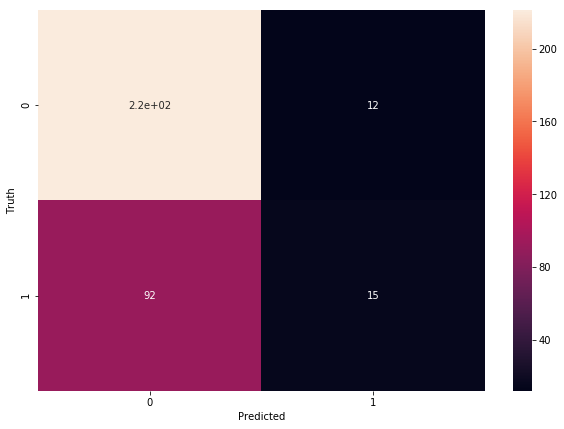

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV1, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("V1-Classification-Confusion.png")

# confusion matrix for v1

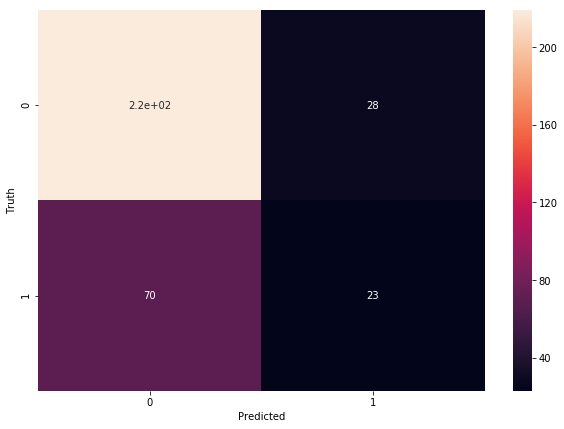

In [19]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV2, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("V2-Classification-Confusion.png")

# confusion matrix for v2

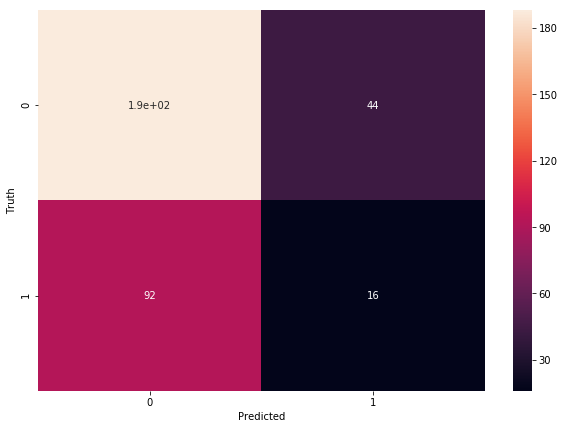

In [20]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_staticV3, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.savefig("V3-Classification-Confusion.png")

# confusion matrix for v3

In [21]:
roc_auc_score(np.array(y_test1), np.array(y_predicted1)) 

0.5443423849825517

In [22]:
roc_auc_score(np.array(y_test2), np.array(y_predicted2)) 

0.5669757520351748

In [23]:
roc_auc_score(np.array(y_test3), np.array(y_predicted3)) 

0.4792464878671775

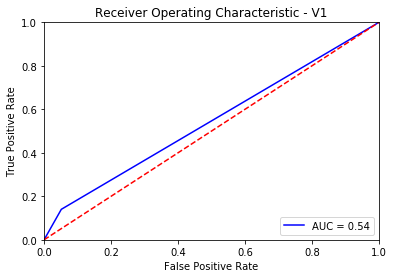

In [24]:
plt.title('Receiver Operating Characteristic - V1')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("V1-Classification-ROC.png")
plt.show()


# ROC Curve for v1

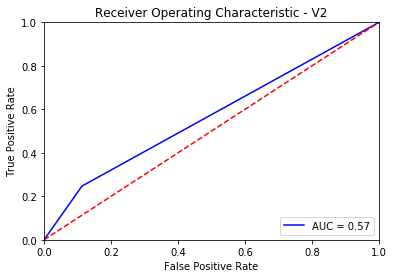

In [25]:
plt.title('Receiver Operating Characteristic - V2')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("V2-Classification-ROC.png")
plt.show()


# ROC Curve for v2

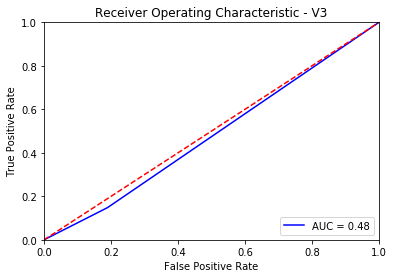

In [26]:
plt.title('Receiver Operating Characteristic - V3')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("V3-Classification-ROC.png")
plt.show()

# ROC Curve for v3

In [32]:
y_predictedR1 = model_staticRegV1.predict(x_testR1)
y_predictedR2 = model_staticRegV2.predict(x_testR2)
y_predictedR3 = model_staticRegV3.predict(x_testR3)
y_predictedR4 = model_staticRegV4.predict(x_testR4)

# get predicted mortality rates

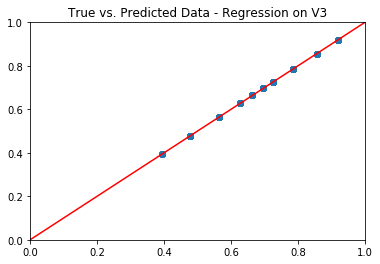

In [30]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V3')
plt.scatter(y_testR3, y_predictedR3)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V3-Regression-Comparison.png")
plt.show()

# plot true vs predicted data (want to see a y=x correlation)


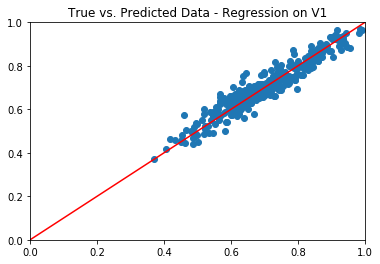

In [28]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V1')
plt.scatter(y_testR1, y_predictedR1)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V1-Regression-Comparison.png")
plt.show()

# plot true vs predicted data (want to see a y=x correlation)

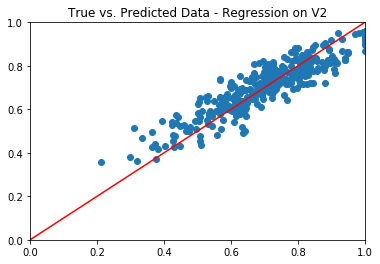

In [31]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V2')
plt.scatter(y_testR2, y_predictedR2)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V2-Regression-Comparison.png")
plt.show()
# plot true vs predicted data (want to see a y=x correlation)

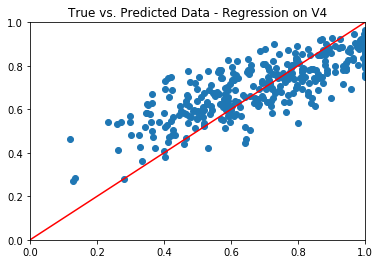

In [33]:
import matplotlib.lines as mlines
plt.title('True vs. Predicted Data - Regression on V4')
plt.scatter(y_testR4, y_predictedR4)
line = mlines.Line2D([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("V4-Regression-Comparison.png")
plt.show()
# plot true vs predicted data (want to see a y=x correlation)

In [34]:
RV1_feature_importances = pd.DataFrame(model_staticRegV1.feature_importances_,
                                   index = x_trainR1.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
RV1_feature_importances
# determine feature importance by Gini Index 

,importance
Age,0.841161
LDL,0.021640
ApacheII,0.019973
INR,0.019116
O2,0.018721
Platelet,0.012787
WBC,0.012047
Urea,0.010298
HR,0.008655
Creatinine,0.008087


In [35]:
RV2_feature_importances = pd.DataFrame(model_staticRegV2.feature_importances_,
                                   index = x_trainR2.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
RV2_feature_importances

,importance
Age,0.437993
LDL,0.158653
ApacheII,0.065933
O2,0.059537
INR,0.055722
Platelet,0.049788
HR,0.024476
BP,0.023758
Urea,0.023443
WBC,0.022986


In [36]:
RV3_feature_importances = pd.DataFrame(model_staticRegV3.feature_importances_,
                                   index = x_trainR3.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
RV3_feature_importances

,importance
Age,0.279279
INR,0.254123
ApacheII,0.161562
O2,0.155819
LDL,0.149188
RBC,0.000030
Sex,0.000000
Urine_Volume,0.000000
Creatinine,0.000000
Urea,0.000000


In [37]:
RV4_feature_importances = pd.DataFrame(model_staticRegV4.feature_importances_,
                                   index = x_trainR4.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
RV4_feature_importances

,importance
O2,0.263807
LDL,0.137614
INR,0.131138
ApacheII,0.077696
Platelet,0.062474
Age,0.055301
RBC,0.038581
Urine Volume,0.037572
HR,0.037552
WBC,0.037226
